In [204]:
import pandas as pd
import numpy as np


data=pd.read_csv('tempo80.txt',header=None)
data.columns = ['runid','slotframecycle','moteid','collision']

Data = pd.DataFrame()
NbrSlotFrameCycles=200
#length = len(data)

index=list(range(NbrSlotFrameCycles+1))
#run=6

grouped=data.groupby('runid')
#print(data)
#print(grouped.get_group(200))

for run in grouped.groups.keys():
    _grp          = grouped.get_group(run)
    grp           = _grp[['slotframecycle','collision' ]]
    grp_counts    = grp.groupby(['slotframecycle']).count().reset_index().sort_values(by='slotframecycle', ascending=True)
    grp_indexed   = grp_counts.set_index('slotframecycle')
    grp_filled    = grp_indexed.reindex(index, fill_value=0)
    grp_collision = grp_filled['collision']

    Data[run] = grp_collision

# add  last column to Data with average collisions over runs
Data['collision for 80 motes']= Data.mean(axis=1)

#print(Data)

#print(Data['Average_nbr_collision'])
#Data['standard_deviation']= Data.std()

# if I would like to print a given set of the Data. here it is the first 200 elements
#new_set_of_data=Data['collision for 80 motes'].head(250)

##new_set_of_data

[Text(17.2,0.5,'Average collided packets'), Text(0.5,17.2,'Slotframe cycle')]

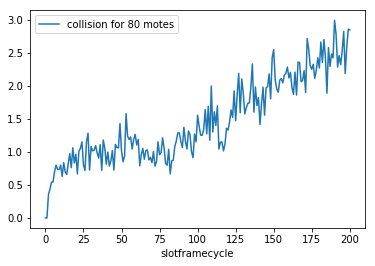

In [205]:
#from numpy import *
import matplotlib.pyplot as plt

#figure= new_set_of_data.plot(y='collision for 80 motes')
figure2= Data.plot(y='collision for 80 motes')


figure.set(xlabel="Slotframe cycle", ylabel="Average collided packets")